In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
import numpy as np

from scipy.optimize import minimize

def c(_x,_a,_b):
    return _a - _b*_x
def tomin(_thetas, _mu, _mui, _sigma, _rho, _a, _b):
    x = _thetas[0]
    y = _thetas[1]
    logdrift = x*(_mu-c(x,_a,_b)-(x+y)*_mui)\
                    + y*(_mu - c(y,_a,_b) + x*_mui)\
                    +(1-x-y)*x*_mui\
                    + (-x*x*_sigma*_sigma/2 - y*y*_sigma*_sigma/2 - _rho*x*y*_sigma*_sigma)
    return -logdrift

In [4]:
mudol    = .1
mui      = .3
sigmadol = .5
rho      = .4
a        = 0 #.01
b        = a

from scipy.optimize import LinearConstraint

linear_constraint = LinearConstraint([[0, 1], [1, 0], [1, 1]], [0, 0, 0], [1, 1, 1])

res = minimize(lambda thetas: tomin(thetas, mudol, mui, sigmadol, rho, a, b),  [0.5,0.5], constraints = [linear_constraint])
#, method='nelder-mead',               options={'xatol': 1e-8, 'disp': True}
res.x

array([ 2.75862061e-01, -1.84966622e-17])

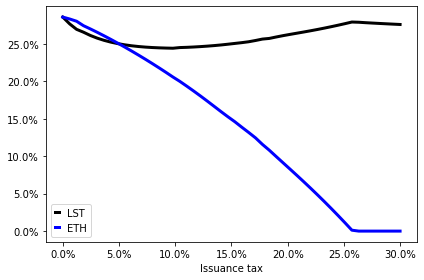

In [5]:
mudol    = .1
mui      = .3
sigmadol = .5
rho      = .4
a        = 0 #.02
b        = a

muis = np.linspace(0, .3)

thetas = [minimize(lambda thetas: tomin(thetas, mudol, mui, sigmadol, rho, a, b),  [0.5,0.5], constraints = [linear_constraint]).x for mui  in muis]

fig, ax = plt.subplots(1, 1)

def minmiax(x):
    return min(max(x, 0), 1)

ax.plot(muis, [theta[0] for theta in thetas], color='k', lw=3)
ax.plot(muis, [theta[1] for theta in thetas], color='b', lw=3)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(['LST','ETH'], handlelength=0.4)
ax.set_xlabel('Issuance tax')
plt.tight_layout()
plt.savefig('issuance_nocost.png')

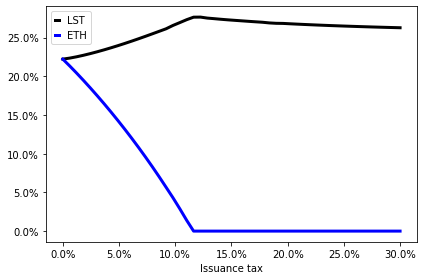

In [8]:
mudol    = .1
mui      = .3
sigmadol = .5
rho      = .4
a        = .04
b        = a

muis = np.linspace(0, .3)

thetas = [minimize(lambda thetas: tomin(thetas, mudol, mui, sigmadol, rho, a, b),  [0.5,0.5], constraints = [linear_constraint]).x for mui  in muis]

fig, ax = plt.subplots(1, 1)

def minmiax(x):
    return min(max(x, 0), 1)

ax.plot(muis, [theta[0] for theta in thetas], color='k', lw=3)
ax.plot(muis, [theta[1] for theta in thetas], color='b', lw=3)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(['LST','ETH'], handlelength=0.4)
ax.set_xlabel('Issuance tax')
plt.tight_layout()
plt.savefig('issuance_cost.png')

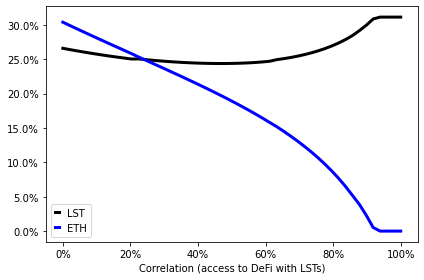

In [21]:
mudol    = .1
mui      = .09
sigmadol = .5
rho      = .4
a        = 0 #.03
b        = a

# high taw issuance
rhos = np.linspace(0, 1)
thetas = [minimize(lambda thetas: tomin(thetas, mudol, mui, sigmadol, rho, a, b),  [0.4,0.4], constraints = [linear_constraint]).x for rho  in rhos]

fig, ax = plt.subplots(1, 1)
ax.plot(rhos, [theta[0] for theta in thetas], color='k', lw=3)
ax.plot(rhos, [theta[1] for theta in thetas], color='b', lw=3)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(['LST','ETH'], handlelength=0.4)
ax.set_xlabel('Correlation (access to DeFi with LSTs)')
plt.tight_layout()
plt.savefig('correl_nocost.png')

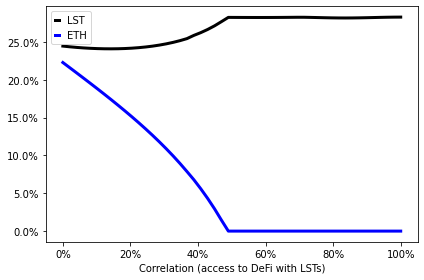

In [23]:
mudol    = .1
mui      = .09
sigmadol = .5
rho      = .4
a        = .04
b        = a

# high taw issuance
rhos = np.linspace(0, 1)
thetas = [minimize(lambda thetas: tomin(thetas, mudol, mui, sigmadol, rho, a, b),  [0.4,0.4], constraints = [linear_constraint]).x for rho  in rhos]

fig, ax = plt.subplots(1, 1)
ax.plot(rhos, [theta[0] for theta in thetas], color='k', lw=3)
ax.plot(rhos, [theta[1] for theta in thetas], color='b', lw=3)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(['LST','ETH'], handlelength=0.4)
ax.set_xlabel('Correlation (access to DeFi with LSTs)')
plt.tight_layout()
plt.savefig('correl_cost.png')